Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático
-----------------------------------------------------------------------
        1 | 0.679570 | 3.204295e-01 | 4.715178e-01 | 1.026751e-01
        2 | 0.493258 | 1.863129e-01 | 3.777194e-01 | 3.471251e-02
        3 | 0.409411 | 8.384697e-02 | 2.047992e-01 | 7.030314e-03
        4 | 0.376482 | 3.292808e-02 | 8.746246e-02 | 1.084259e-03
        5 | 0.364287 | 1.219497e-02 | 3.347621e-02 | 1.487172e-04
        6 | 0.359872 | 4.415495e-03 | 1.226963e-02 | 1.949660e-05
        7 | 0.358286 | 1.585510e-03 | 4.425258e-03 | 2.513843e-06
        8 | 0.357719 | 5.676168e-04 | 1.586768e-03 | 3.221888e-07
        9 | 0.357516 | 2.029896e-04 | 5.677779e-04 | 4.120478e-08
       10 | 0.357443 | 7.256465e-05 | 2.030102e-04 | 5.265628e-09
       11 | 0.357417 | 2.593681e-05 | 7.256728e-05 | 6.727180e-10
       12 | 0.357408 | 9.270146e-06 | 2.593714e-05 | 8.593560e-11


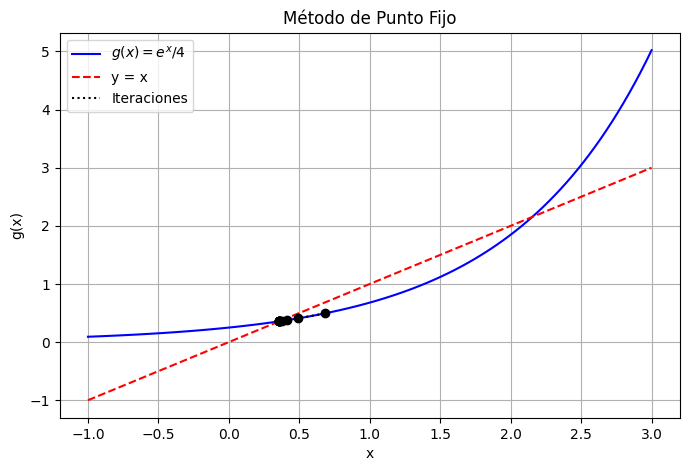

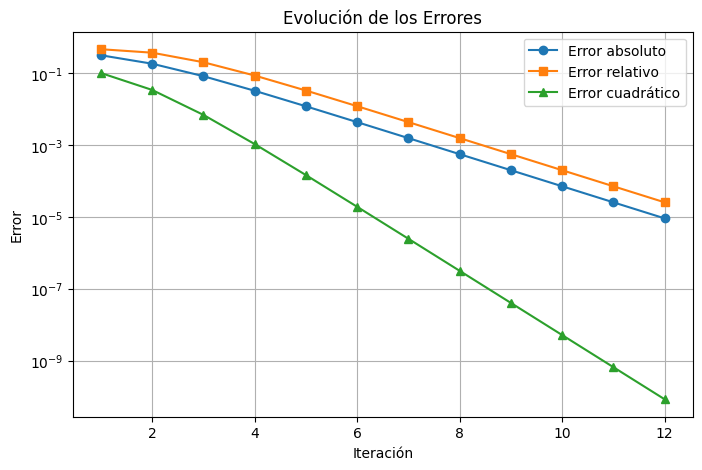

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función g(x) para el método de punto fijo
def g(x):
    return np.exp(x) / 4  # Transformación de la ecuación e^x - 4x = 0 en x = g(x)

# Criterio de convergencia: g'(x) debe cumplir |g'(x)| < 1 para asegurar convergencia
def g_prime(x):
    return np.exp(x) / 4  # Derivada de g(x) = e^x / 4

# Función para calcular el error absoluto
def error_absoluto(x_new, x_old):
    return abs(x_new - x_old)

# Función para calcular el error relativo
def error_relativo(x_new, x_old):
    return abs((x_new - x_old) / x_new)

# Función para calcular el error cuadrático
def error_cuadratico(x_new, x_old):
    return (x_new - x_old) ** 2

# Implementación del método de punto fijo
def punto_fijo(x0, tol=1e-5, max_iter=100):
    iteraciones = []  # Lista para almacenar los resultados de cada iteración
    errores_abs = []   # Lista para el error absoluto
    errores_rel = []   # Lista para el error relativo
    errores_cuad = []  # Lista para el error cuadrático

    x_old = x0  # Valor inicial dado por el usuario

    for i in range(max_iter):  # Ciclo de iteraciones hasta alcanzar la tolerancia o el máximo de iteraciones
        x_new = g(x_old)  # Aplicar la función g(x)

        # Calcular los errores
        e_abs = error_absoluto(x_new, x_old)
        e_rel = error_relativo(x_new, x_old)
        e_cuad = error_cuadratico(x_new, x_old)

        # Guardar los resultados de la iteración
        iteraciones.append((i+1, x_new, e_abs, e_rel, e_cuad))
        errores_abs.append(e_abs)
        errores_rel.append(e_rel)
        errores_cuad.append(e_cuad)

        # Criterio de parada: si el error absoluto es menor que la tolerancia, detener
        if e_abs < tol:
            break

        x_old = x_new  # Actualizar el valor de x para la siguiente iteración

    return iteraciones, errores_abs, errores_rel, errores_cuad

# Parámetro inicial para el método de punto fijo
x0 = 1.0  # Puedes cambiar este valor según lo que creas conveniente

# Ejecutar el método y almacenar resultados
iteraciones, errores_abs, errores_rel, errores_cuad = punto_fijo(x0)

# Imprimir la tabla de iteraciones con los errores correspondientes
print("Iteración | x_n      | Error absoluto | Error relativo | Error cuadrático")
print("-----------------------------------------------------------------------")
for it in iteraciones:
    print(f"{it[0]:9d} | {it[1]:.6f} | {it[2]:.6e} | {it[3]:.6e} | {it[4]:.6e}")

# Graficar la función g(x) junto con la línea y = x para visualizar la convergencia
x_vals = np.linspace(-1, 3, 100)  # Rango de valores de x
y_vals = g(x_vals)  # Evaluación de g(x) en el rango dado

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r"$g(x) = e^x / 4$", color="blue")  # Gráfica de g(x)
plt.plot(x_vals, x_vals, linestyle="dashed", color="red", label="y = x")  # Línea y = x

# Graficar los puntos de iteraciones
x_points = [it[1] for it in iteraciones]
y_points = [g(x) for x in x_points]
plt.scatter(x_points, y_points, color="black", zorder=3)
plt.plot(x_points, y_points, linestyle="dotted", color="black", label="Iteraciones")

# Configuración de la gráfica
plt.xlabel("x")
plt.ylabel("g(x)")
plt.legend()
plt.grid(True)
plt.title("Método de Punto Fijo")
plt.savefig("punto_fijo_convergencia.png")  # Guardar la imagen de la gráfica
plt.show()

# Graficar la evolución de los errores en escala logarítmica
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errores_abs) + 1), errores_abs, marker="o", label="Error absoluto")
plt.plot(range(1, len(errores_rel) + 1), errores_rel, marker="s", label="Error relativo")
plt.plot(range(1, len(errores_cuad) + 1), errores_cuad, marker="^", label="Error cuadrático")

# Configuración de la gráfica de errores
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.yscale("log")  # Escala logarítmica para visualizar mejor la convergencia
plt.legend()
plt.grid(True)
plt.title("Evolución de los Errores")
plt.savefig("errores_punto_fijo.png")  # Guardar la gráfica de errores
plt.show()
